# Aakash Tirathdas

## Research question/interests

**To what degree has the COVID-19 pandemic affected the aeropolane industry in terms of delayed and cancelled flights, and was there an improvement of sorts over the period of the January 2022?**

I would look into this question by going over the relationship between the flights delayed and cancelled and its relation to the point of time within the month to see if there was any improvement of sorts.

I would do this through as several number of comparisms, some being:

- The percentage of flights delayed, cancelled and both per day. 
    - This could be done by finding the (flights delayed/cancelled/both within the day/total flights during the day)*100 for each week.
    
- The percentage of flights delayed, cancelled and both per week.
    - This could be done by finding the (flights delayed/cancelled/both within the week/total flights during the week)*100 for each week.

- The average number of flights delayed, cancelled and both depending on the day of the week.
    - For example, the average number of flights delayed on Mondays over January 2022.
    
- The average and total time of delay for each day and its relationship through the month.

- To check whether the delay is affected by the distance travelled by the aeroplane. 
    - This can be done by having different groups with different distance travelled and forming a value of average delayed time. 

**Which certain countries have a large number of flights cancelled and delayed in the month of January in 2022 and if so was it on arrivals or departures?**

I will look into the above question by importing an additional data set to compare the origin and destination of flights and see if the delays or cancellations have a relationship to the country. 

---

## Imported libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

### Seaborn theme setup

In [ ]:
sns.set_theme(style="ticks",
              font_scale=1.3, # This scales the fonts slightly higher
             )

## Loaded data set

In [ ]:

df = pd.read_csv('../data/raw/Jan_2020_ontime.csv')
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN


In [ ]:
cancellation_daily=df.loc[:,["DAY_OF_MONTH","CANCELLED","DEP_DEL15","ARR_DEL15"]]
#making the columns of type boolean
cancellation_daily["CANCELLED"]=cancellation_daily["CANCELLED"].astype(bool)
cancellation_daily["DEP_DEL15"]=cancellation_daily["DEP_DEL15"].astype(bool)
cancellation_daily["ARR_DEL15"]=cancellation_daily["ARR_DEL15"].astype(bool)
cancellation_daily=cancellation_daily.rename(columns={"DEP_DEL15":"Departure Delay","ARR_DEL15":"Arrival Delay"})

cancellation_daily

,DAY_OF_MONTH,CANCELLED,Departure Delay,Arrival Delay
0,1,False,False,False
1,1,False,False,False
2,1,False,False,False
3,1,False,False,False
4,1,False,False,False
...,...,...,...,...
607341,31,False,True,True
607342,31,False,False,False
607343,31,False,False,False
607344,31,False,False,False


In [ ]:
#making a dataset which has a count of all the true values in the 3 columns above
counts_df=cancellation_daily.groupby("DAY_OF_MONTH")[["CANCELLED","Departure Delay","Arrival Delay"]].sum()
counts_df

,CANCELLED,Departure Delay,Arrival Delay
DAY_OF_MONTH,,,
1,121,2550,2395
2,89,3034,2924
3,92,4050,4061
4,60,4342,4598
5,78,3714,3355
6,52,2752,2695
7,77,1784,1717
8,84,2417,2439
9,44,1747,1702


[Text(0.5, 1.0, 'Flights adjusted during January 2020'),
 Text(0, 0.5, 'Number of flights')]

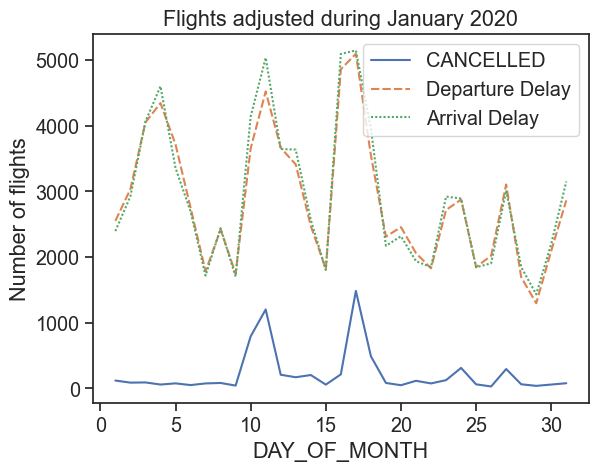

In [ ]:
ax_daily_plot1=sns.lineplot(data= counts_df)
ax_daily_plot1.set(title="Flights adjusted during January 2020", ylabel="Number of flights")

In [ ]:
counts_df["total flights"]=cancellation_daily["DAY_OF_MONTH"].value_counts()
counts_df

,CANCELLED,Departure Delay,Arrival Delay,total flights
DAY_OF_MONTH,,,,
1,121,2550,2395,18114
2,89,3034,2924,20612
3,92,4050,4061,20616
4,60,4342,4598,18099
5,78,3714,3355,20632
6,52,2752,2695,20943
7,77,1784,1717,19164
8,84,2417,2439,19670
9,44,1747,1702,20789


In [ ]:
counts_df["perctentage of flights cancelled"]=counts_df["CANCELLED"]/counts_df["total flights"]*100
counts_df["perctentage of flights dealyed on departure"]=counts_df["Departure Delay"]/counts_df["total flights"]*100
counts_df["perctentage of flights delayed on arrival"]=counts_df["Arrival Delay"]/counts_df["total flights"]*100

counts_df

,CANCELLED,Departure Delay,Arrival Delay,total flights,perctentage of flights cancelled,perctentage of flights dealyed on departure,perctentage of flights delayed on arrival
DAY_OF_MONTH,,,,,,,
1,121,2550,2395,18114,0.667992,14.077509,13.221817
2,89,3034,2924,20612,0.431787,14.719581,14.185911
3,92,4050,4061,20616,0.446255,19.644936,19.698293
4,60,4342,4598,18099,0.331510,23.990276,25.404718
5,78,3714,3355,20632,0.378054,18.001163,16.261148
6,52,2752,2695,20943,0.248293,13.140429,12.868261
7,77,1784,1717,19164,0.401795,9.309121,8.959507
8,84,2417,2439,19670,0.427046,12.287748,12.399593
9,44,1747,1702,20789,0.211650,8.403483,8.187022


[Text(0.5, 1.0, 'Flights adjusted during January 2020 as percentages'),
 Text(0, 0.5, 'Number of flights adjeusted as a perctentage')]

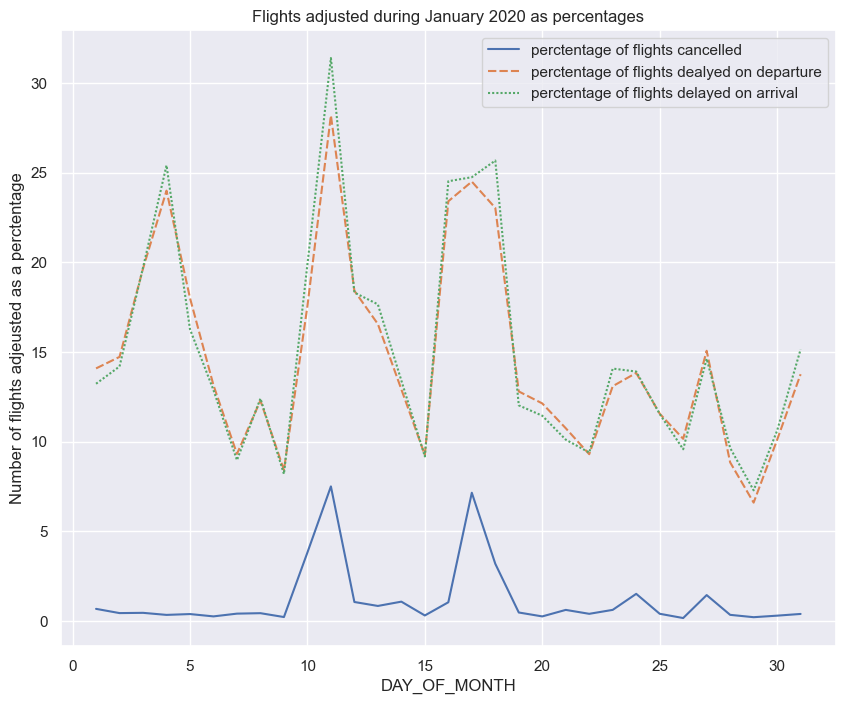

In [ ]:
counts_df_var2=counts_df
counts_df_var2=counts_df_var2.drop(["CANCELLED","Departure Delay","Arrival Delay","total flights"],axis=1)
ax_daily_plot2=sns.lineplot(data= counts_df_var2)
ax_daily_plot2.set(title="Flights adjusted during January 2020 as percentages", ylabel="Number of flights adjeusted as a perctentage")

[Text(0.5, 1.0, 'Flight delays in January 2020')]

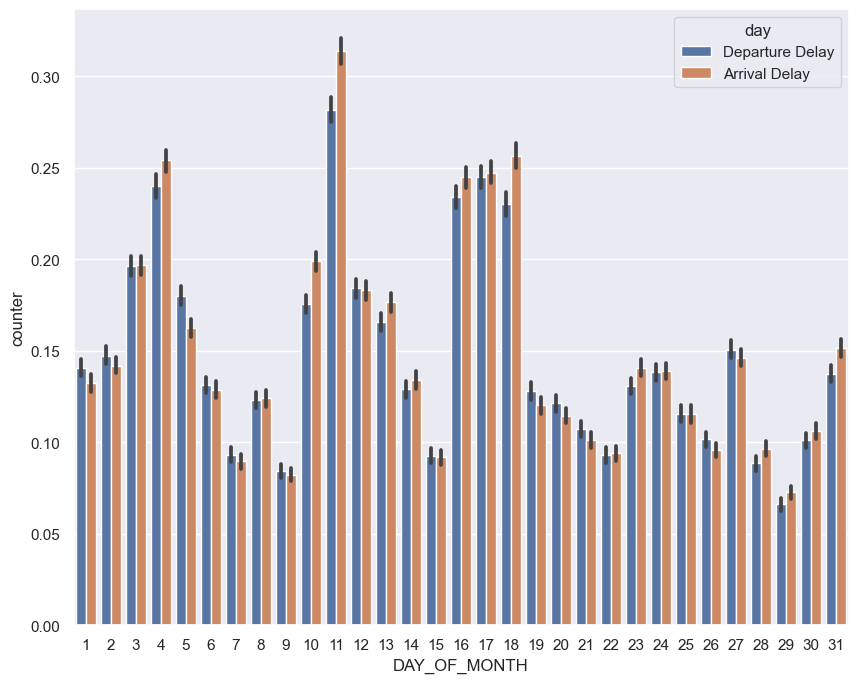

In [ ]:
#makes the 2 delays join together

melted_df=pd.melt(cancellation_daily,id_vars=["DAY_OF_MONTH"], value_vars=["Departure Delay","Arrival Delay"],var_name="day",value_name="counter")
#hue splits them up again
sns.set(rc={"figure.figsize":(10,8)})
ax_daily_plot2=sns.barplot(data=melted_df, x ="DAY_OF_MONTH",y="counter" , hue="day")
ax_daily_plot1.set(title="Flight delays in January 2020")

### Analysis
I will be comparing the graphs with the COVID-19 timeline to see if any events correspond. 

The second graph is a more accurate representaion of the first graph as it takes into consideration of the total number of flights flown within the day. From the first 2 graphs we can point out that generally percentage of cancelled flights is between 0-3%. However, leading upto and on 2 specific days there was over 5% of flights cancelled. 

On January 9th 2020 COVID-19 had its first death. This was immediatly followed by a spike in cancellations and delays. 

On January 15th 2020 the first case of COVID-19 was found in the US. Right after this day we can see a increase in delays and cancellations of flights.

Both spikes are very similar in size. There was an  increase is roughly from 1-7% in cancellations and 9-25% in delays. Since both spikes are of similar size we can assume similar flights were cancelled but can not confirm until further research is done.

We can also see that there is a spike at the start of January starting on the 3rd and peaking on the 4th. This was when the chinese government notified the US of the outbreak of COVID and the US started taking steps to minimise the spread of COVID. This didnt lead to a rise in cancellations but a large spike in delays.

From the 3rd graph - bar graph- we can confirm that delays in arrivals and departures are closely linked. We can see that before and leading upto a spike there is generally a greater number of delayed arrivals whereas after the spike in delays when recovering there is a greater delay in departures. This goes for nearly all days except the 18th. This could be due to the fact that airports were more carful with departing planes to prevent the spread of COVID. 

We can also gather that the day with the highest percentage of delays was the 11th with arrival delays surpasing 30%.

In [ ]:
cancellation_by_day=df.loc[:,["DAY_OF_WEEK","CANCELLED","DEP_DEL15","ARR_DEL15"]]
cancellation_by_day["CANCELLED"]=cancellation_by_day["CANCELLED"].astype(bool)
cancellation_by_day["DEP_DEL15"]=cancellation_by_day["DEP_DEL15"].astype(bool)
cancellation_by_day["ARR_DEL15"]=cancellation_by_day["ARR_DEL15"].astype(bool)
cancellation_by_day=cancellation_by_day.rename(columns={"DEP_DEL15":"Departure Delay","ARR_DEL15":"Arrival Delay"})
cancellation_by_day


,DAY_OF_WEEK,CANCELLED,Departure Delay,Arrival Delay
0,3,False,False,False
1,3,False,False,False
2,3,False,False,False
3,3,False,False,False
4,3,False,False,False
...,...,...,...,...
607341,5,False,True,True
607342,5,False,False,False
607343,5,False,False,False
607344,5,False,False,False


In [ ]:
counts_df_week=cancellation_by_day.groupby("DAY_OF_WEEK")[["CANCELLED","Departure Delay","Arrival Delay"]].sum()
counts_df_week

,CANCELLED,Departure Delay,Arrival Delay
DAY_OF_WEEK,,,
1,569,11719,11658
2,463,8009,8068
3,381,9911,9915
4,535,14450,14838
5,2763,18531,19382
6,1815,14255,15428
7,402,11708,11074


In [ ]:
counts_df_week["total flights"]=cancellation_by_day["DAY_OF_WEEK"].value_counts()
counts_df_week["perctentage of flights cancelled"]=counts_df_week["CANCELLED"]/counts_df_week["total flights"]*100
counts_df_week["perctentage of flights dealyed on departure"]=counts_df_week["Departure Delay"]/counts_df_week["total flights"]*100
counts_df_week["perctentage of flights delayed on arrival"]=counts_df_week["Arrival Delay"]/counts_df_week["total flights"]*100
counts_df_week

,CANCELLED,Departure Delay,Arrival Delay,total flights,perctentage of flights cancelled,perctentage of flights dealyed on departure,perctentage of flights delayed on arrival
DAY_OF_WEEK,,,,,,,
1,569,11719,11658,82389,0.690626,14.223986,14.149947
2,463,8009,8068,76644,0.604092,10.449611,10.526590
3,381,9911,9915,96799,0.393599,10.238742,10.242874
4,535,14450,14838,103676,0.516031,13.937652,14.311895
5,2763,18531,19382,103812,2.661542,17.850538,18.670289
6,1815,14255,15428,65520,2.770147,21.756716,23.547009
7,402,11708,11074,78506,0.512063,14.913510,14.105928


In [ ]:
counts_df_week_var2=counts_df_week
counts_df_week_var2=counts_df_week_var2.drop(["CANCELLED","Departure Delay","Arrival Delay","total flights"],axis=1)
counts_df_week_var2=counts_df_week_var2.reset_index()
weekday={1:"Monday",2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday", 7:"Sunday"}
counts_df_week_var2["DAY_OF_WEEK"]=counts_df_week_var2["DAY_OF_WEEK"].map(weekday)
counts_df_week_var2




,DAY_OF_WEEK,perctentage of flights cancelled,perctentage of flights dealyed on departure,perctentage of flights delayed on arrival
0,Monday,0.690626,14.223986,14.149947
1,Tuesday,0.604092,10.449611,10.526590
2,Wednesday,0.393599,10.238742,10.242874
3,Thursday,0.516031,13.937652,14.311895
4,Friday,2.661542,17.850538,18.670289
5,Saturday,2.770147,21.756716,23.547009
6,Sunday,0.512063,14.913510,14.105928


[Text(0.5, 1.0, 'Flight delays in January 2020 sorted by day')]

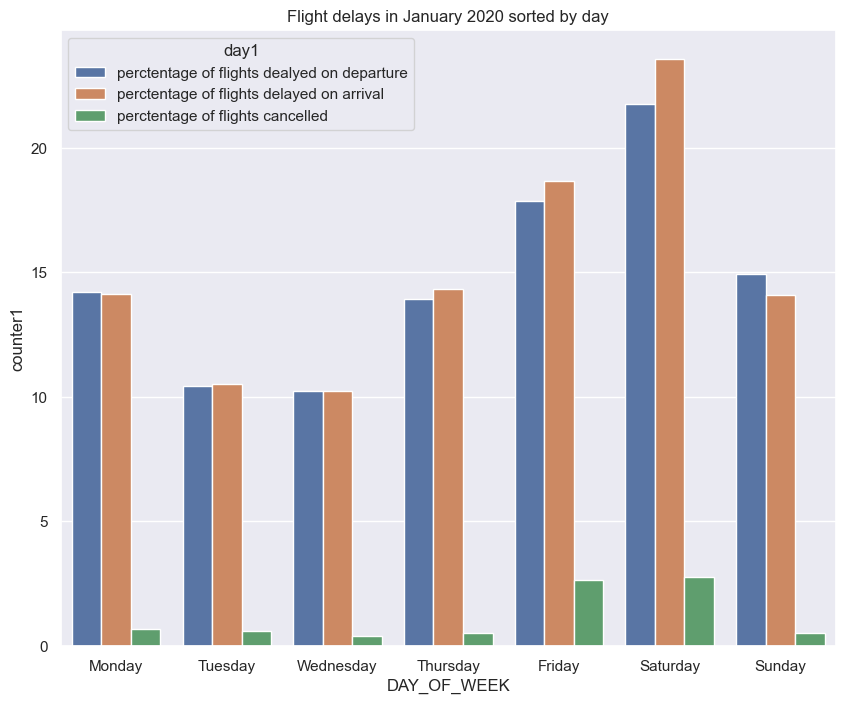

In [ ]:
melted_df_2=pd.melt(counts_df_week_var2,id_vars=["DAY_OF_WEEK"], value_vars=["perctentage of flights dealyed on departure","perctentage of flights delayed on arrival","perctentage of flights cancelled"],var_name="day1",value_name="counter1")
#hue splits them up again
sns.set(rc={"figure.figsize":(10,8)})
ax_day_plot2=sns.barplot(data=melted_df_2, x ="DAY_OF_WEEK",y="counter1" , hue="day1")
ax_day_plot2.set(title="Flight delays in January 2020 sorted by day")

#maybe in future overlay with a line plot with the total number of flight flown each day of the week through the month

From this bar plot we can see that there is a great percentage of cancellations and delays on Saturdays. Saturday is also the day where the least number of flights were flown. We can see that getting closer to the weekend (Friday, Saturday, Sunday) the number of flights cancelled and delayed increase. This could be because to contain the spread of COVID-19 airports cancelled a greater deal of flights that would likely have tourists.